<a href="https://colab.research.google.com/github/stm010/dsci100/blob/main/data_from_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F



**Data From Simulation**

In many cases we will be working with data from simulations.
Below is such as example



In [1]:
def lorenz(x0, y0, z0, dt, nt):
 # Computes the Lorenz caotic system starting at [x0,y0,z0]
  x = np.zeros(nt+1)
  y = np.zeros(nt+1)
  z = np.zeros(nt+1)
  t = np.zeros(nt+1)
  x[0] = x0
  y[0] = y0
  z[0] = z0

  for i in range(nt):
    x[i+1] = x[i] + dt * (10 * (y[i] - x[i]))
    y[i+1] = y[i] + dt * (x[i] * (28 - z[i]) - y[i])
    z[i+1] = z[i] + dt * (x[i] * y[i] - (8/3) * z[i])
    t[i+1] = t[i] + dt
  return x, y, z, t

dt = 0.01
nt = 10

x, y, z, t = lorenz(0.1, 4.5, 1.0, dt, nt)

x1, y1, z1, t1 = lorenz(0.2, 4.6, 1.0, dt, 310)
plt.figure(1, figsize=[15,5])
plt.plot(t,x, t1, x1)

# note accuracy resolution of simulation -- "when can i trust"


NameError: name 'np' is not defined

(0.0, 3.0)

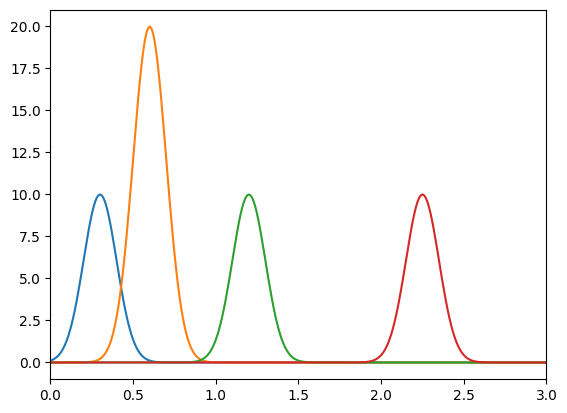

In [3]:
def gaussian(t, t0, w0):
  g = np.exp(-w0*(t-t0)**2)
  return g

g1 = gaussian(t,0.3,50) # blue
g2 = gaussian(t,0.6,50) # yellow
g3 = gaussian(t,1.2,50) # green
g4 = gaussian(t,2.25,50) # red

plt.plot(t, 10*g1,t,20*g2, t, 10*g3, t, 10*g4)

plt.xlim(0,3)

(4, 5001)


(0.0, 3.0)

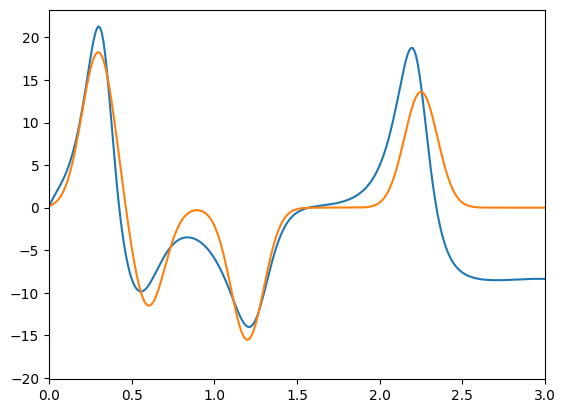

In [4]:
BigG = np.vstack((g1,g2,g3,g4))
print(BigG.shape)

a = np.linalg.lstsq(BigG.T, x, rcond=None)[0] # calc and extract coefficients
xapprox = a[0]*g1 + a[1]*g2 + a[2]*g3 + a[3]*g4 # calc predicted model

plt.plot(t, x, t, xapprox) # plot (1) data and (2) approx. data
plt.xlim(0,3)

In [ ]:
n = 1000  #BigG will have 10 columns for each gaussian
BiG = np.zeros((5001,n))
for i in range(n):
  g = gaussian(t, 3/n*i,50)
  BiG[:,i] = g

  a = np.linalg.lstsq(BiG, x, rcond=None)[0] # calc and extract coefficients
  xapprox = BiG@a
  res = x - xapprox

print((res**2).mean())
plt.plot(t, x, t, xapprox) # plot (1) data and (2) approx. data
plt.xlim(0,3)
